# HW2 - Problem 2


In [2]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


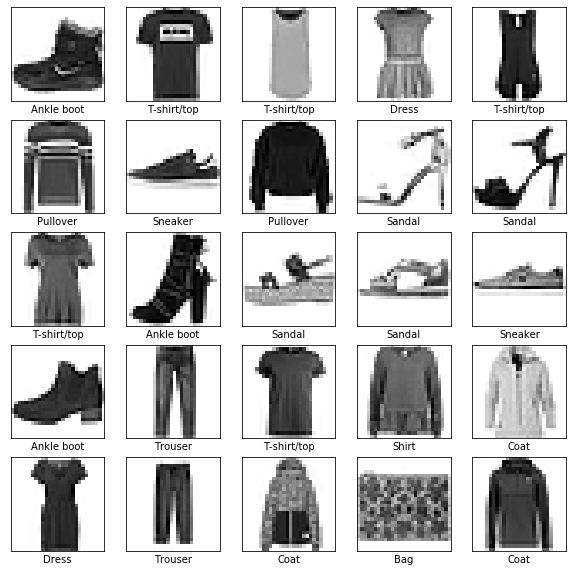

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

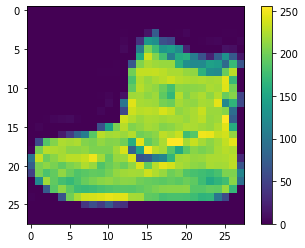

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Overfit model
### We find through this model that the training accuracy passes the validation accuracy after about 10 epochs, implying a heavily overfit model. By have an absurd number of nodes at each layer, the model is learning representations that belong only to the training data, and not images in general


In [6]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(400, activation=tf.nn.relu),
    keras.layers.Dense(300, activation=tf.nn.relu),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 50
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 14s 237us/sample - loss: 0.4801 - acc: 0.8248 - val_loss: 0.3939 - val_acc: 0.8597
Epoch 2/50
60000/60000 [==============================] - 15s 242us/sample - loss: 0.3638 - acc: 0.8658 - val_loss: 0.3782 - val_acc: 0.8625
Epoch 3/50
60000/60000 [==============================] - 14s 232us/sample - loss: 0.3250 - acc: 0.8794 - val_loss: 0.3542 - val_acc: 0.8732
Epoch 4/50
60000/60000 [==============================] - 13s 214us/sample - loss: 0.3050 - acc: 0.8851 - val_loss: 0.3619 - val_acc: 0.8795
Epoch 5/50
60000/60000 [==============================] - 13s 216us/sample - loss: 0.2838 - acc: 0.8932 - val_loss: 0.3497 - val_acc: 0.8721
Epoch 6/50
60000/60000 [==============================] - 13s 218us/sample - loss: 0.2696 - acc: 0.8982 - val_loss: 0.3230 - val_acc: 0.8868
Epoch 7/50
60000/60000 

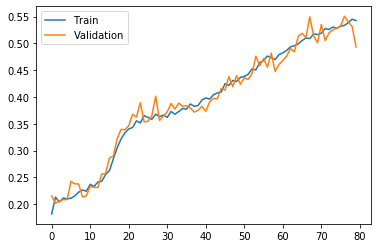

In [10]:
plt.plot(history.history['acc'], label="Train")
plt.plot(history.history['val_acc'], label="Validation")
plt.legend()

## Underfit Model

To cause an underfit model, we simply do the opposite of the previous model. There are simply far too few modes to learn any serious representation of the data, so the model will underfit.

In [11]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(2, activation=tf.nn.sigmoid),
    keras.layers.Dense(2, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 150
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 3s 52us/sample - loss: 2.2760 - acc: 0.1308 - val_loss: 2.2477 - val_acc: 0.2074
Epoch 2/150
60000/60000 [==============================] - 3s 52us/sample - loss: 2.2080 - acc: 0.2046 - val_loss: 2.1581 - val_acc: 0.1989
Epoch 3/150
60000/60000 [==============================] - 3s 51us/sample - loss: 2.0861 - acc: 0.2016 - val_loss: 2.0108 - val_acc: 0.1956
Epoch 4/150
60000/60000 [==============================] - 3s 51us/sample - loss: 1.9407 - acc: 0.1991 - val_loss: 1.8816 - val_acc: 0.2066
Epoch 5/150
60000/60000 [==============================] - 3s 51us/sample - loss: 1.8383 - acc: 0.2048 - val_loss: 1.8053 - val_acc: 0.2054
Epoch 6/150
60000/60000 [==============================] - 3s 50us/sample - loss: 1.7805 - acc: 0.2068 - val_loss: 1.7629 - val_acc: 0.2141
Epoch 7/150
60000/60000 [==============================] - 3s 51us/sample - loss: 1.7476 - acc: 0.2097 - val_l

We can see from the following graph that after around 100 epochs, the model flatlines at about 60% validation accuracy, meaning that the model will remain non-predictive.


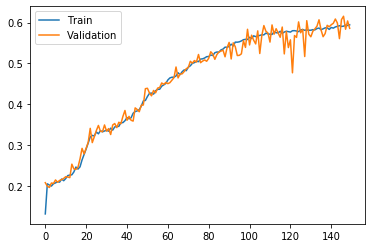

In [12]:
plt.plot(history.history['acc'], label="Train")
plt.plot(history.history['val_acc'], label="Validation")
plt.legend()

# Pretty good fit model

A simplistic model below is able to capture the most important features of the dataset, and converges on an relatively optimal solution (about 90% accuracy) after about 15 epochs. Note, that Fashion MNIST was designed to be not so easily solveable without advanced layers such as a convolution

In [16]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 15
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 86us/sample - loss: 0.8165 - acc: 0.7205 - val_loss: 0.5631 - val_acc: 0.7986
Epoch 2/15
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4971 - acc: 0.8266 - val_loss: 0.4908 - val_acc: 0.8268
Epoch 3/15
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4470 - acc: 0.8422 - val_loss: 0.4607 - val_acc: 0.8374
Epoch 4/15
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4154 - acc: 0.8529 - val_loss: 0.4429 - val_acc: 0.8452
Epoch 5/15
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3932 - acc: 0.8601 - val_loss: 0.4190 - val_acc: 0.8503
Epoch 6/15
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3744 - acc: 0.8674 - val_loss: 0.4131 - val_acc: 0.8532
Epoch 7/15
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3596 - acc: 0.8707 - val_loss: 0.

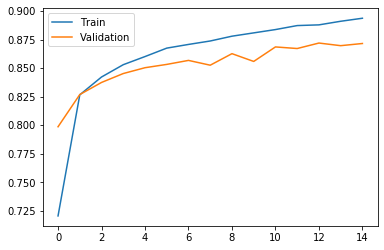

In [17]:
plt.plot(history.history['acc'], label="Train")
plt.plot(history.history['val_acc'], label="Validation")
plt.legend()